# Profitability & Risk–Return Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('loan_cleaned.csv')

In [3]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,dti,purpose,issue_d,loan_status,total_pymnt,default_flag,Profit,income_bucket,int_rate_bucket,issue_year,risk_category
0,5000,36,10.65,162.87,B,B2,10.0,24000.0,27.65,credit_card,2011-12-01,Fully Paid,5863.155187,0,863.155187,Low,Low,2011,Low / Moderate Risk
1,2500,60,15.27,59.83,C,C4,0.0,30000.0,1.00,car,2011-12-01,Charged Off,1008.710000,1,-1491.290000,Low,Medium,2011,High Risk
2,2400,36,15.96,84.33,C,C5,10.0,12252.0,8.72,small_business,2011-12-01,Fully Paid,3005.666844,0,605.666844,Low,Medium,2011,Low / Moderate Risk
3,10000,36,13.49,339.31,C,C1,10.0,49200.0,20.00,other,2011-12-01,Fully Paid,12231.890000,0,2231.890000,Mid,Medium,2011,Low / Moderate Risk
4,3000,60,12.69,67.79,B,B5,1.0,80000.0,17.94,other,2011-12-01,Current,3513.330000,0,513.330000,Mid,Medium,2011,Low / Moderate Risk


### Average Profit by Loan Grade

In [4]:
grade_profit = df.groupby('grade')['Profit'].mean().sort_index()

In [5]:
grade_profit

grade
A     383.895404
B     841.987399
C    1013.383263
D    1306.364298
E    1736.657477
F    2052.198589
G    2790.760690
Name: Profit, dtype: float64

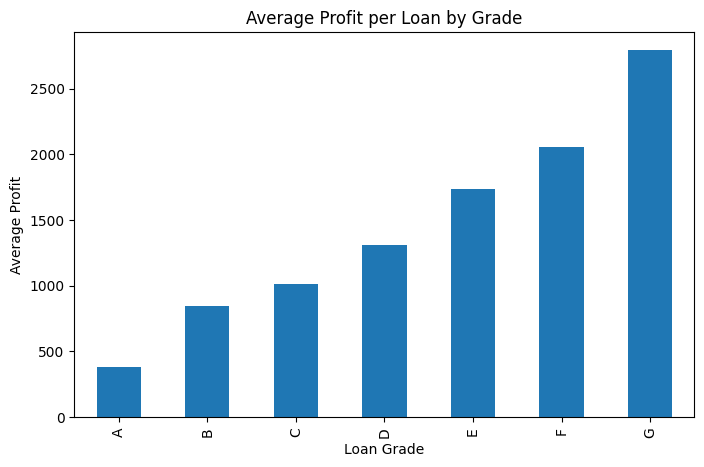

In [6]:
grade_profit.plot(kind='bar', figsize=(8,5))
plt.title("Average Profit per Loan by Grade")
plt.xlabel("Loan Grade")
plt.ylabel("Average Profit")
plt.show()

All loan grades generate positive average profit; however, average profit increases for lower-quality grades, reflecting higher interest rates charged to riskier borrowers and illustrating the risk–return tradeoff.  
Higher-risk grades show higher average profit due to increased pricing, despite higher default risk.

### Risk vs Return Table

In [8]:
risk_return = df.groupby('grade').agg({
    'default_flag': 'mean',
    'Profit': 'mean'
}).reset_index()


In [10]:
risk_return

,grade,default_flag,Profit
0,A,0.059693,383.895404
1,B,0.118552,841.987399
2,C,0.166337,1013.383263
3,D,0.210665,1306.364298
4,E,0.251583,1736.657477
5,F,0.304099,2052.198589
6,G,0.319620,2790.760690


**A & B** → Best balance (safe + profitable)  
**C & D** → Growth segment (moderate risk, good return)  
**E–G** → Speculative segment (high return, high danger)  

Grades A and B represent ideal segments with low default rates and positive profits. While lower-quality grades (E–G) generate higher average profits, they also exhibit substantially higher default rates, indicating a high-risk, high-return tradeoff.  

Safer grades are steadily profitable, while riskier grades earn more but default much more often.  

### Risk–Return Scatter Plot

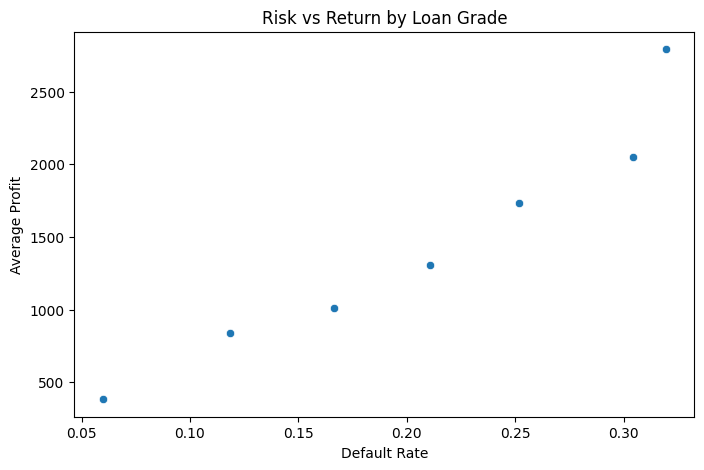

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='default_flag', y='Profit',data=risk_return)
plt.title("Risk vs Return by Loan Grade")
plt.xlabel("Default Rate")
plt.ylabel("Average Profit")
plt.show()


**Higher default → higher profit**  
**Very consistent pattern**  

Higher-risk loan grades exhibit both higher default rates and higher average profits, illustrating a clear risk–return tradeoff.  
The positive relationship between default rate and average profit reflects risk-based pricing and a risk–return tradeoff.

### Profit by Interest Rate Bucket

In [14]:
profit_irb = df.groupby('int_rate_bucket')['Profit'].mean()

In [15]:
profit_irb

int_rate_bucket
High         1692.504109
Low           748.763206
Medium       1130.138048
Very High    2116.263928
Very Low      328.874364
Name: Profit, dtype: float64

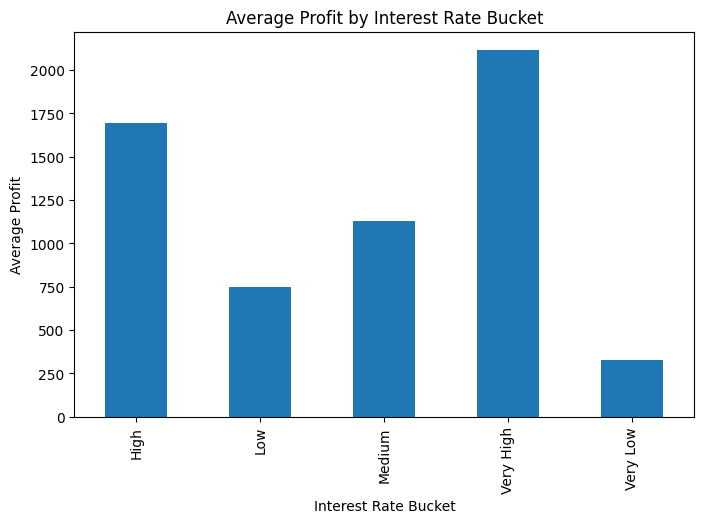

In [16]:
profit_irb.plot(kind = 'bar', figsize=(8,5))
plt.title("Average Profit by Interest Rate Bucket")
plt.xlabel("Interest Rate Bucket")
plt.ylabel("Average Profit")
plt.show()

Average profit ≠ guaranteed profit.  

High-rate segment has:  
  Bigger upsides  
  Bigger downside shocks  

A few extreme defaults can:  
  Wipe out many good loans  

**High-rate loans earn more, but they also default more often.**  
Although high-interest-rate loans exhibit higher default rates, they remain profitable on average due to risk-based pricing that compensates for elevated risk.

### Profit by Income Bucket

In [17]:
profit_IB = df.groupby('income_bucket')['Profit'].mean()

In [18]:
profit_IB

income_bucket
High         1988.997377
Low           388.771055
Mid           847.429738
Upper-Mid    1400.063398
Very High    2552.836233
Name: Profit, dtype: float64

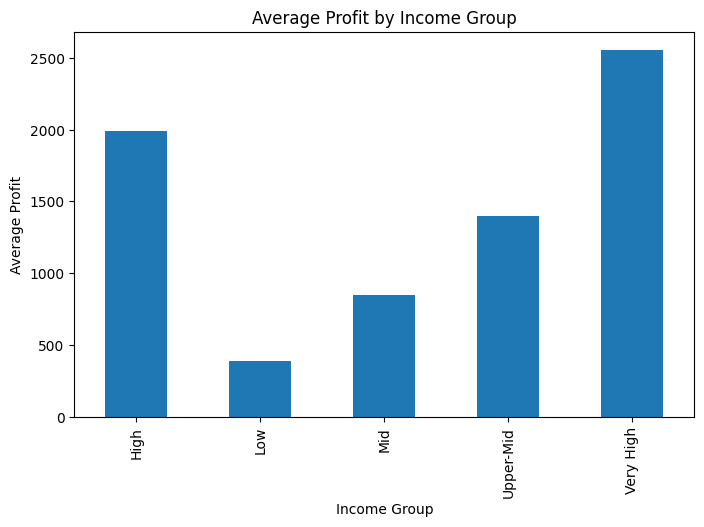

In [19]:
profit_IB.plot(kind='bar', figsize=(8,5))
plt.title("Average Profit by Income Group")
plt.xlabel("Income Group")
plt.ylabel("Average Profit")
plt.show()

Average profit increases with borrower income, indicating that higher-income borrowers generate more stable and higher returns.

**Higher-income borrowers make more profit for the lender.**

## Profitability Insights

- Lower-risk grades generate stable positive profits  
- Higher-risk grades generate higher average profits but with substantially higher default risk  
- Average profit increases across higher interest rate buckets, reflecting a risk–return tradeoff  
- Mid-to-high income segments tend to be more profitable  